## Handling Ordinal data

In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [9]:
date  = datetime.datetime.today()
date_list = [date - datetime.timedelta(days = x)  for x in range(0,20)]
df = pd.DataFrame(date_list)
df.columns = ['day']
df

,day
0,2021-04-24 16:05:36.343898
1,2021-04-23 16:05:36.343898
2,2021-04-22 16:05:36.343898
3,2021-04-21 16:05:36.343898
4,2021-04-20 16:05:36.343898
5,2021-04-19 16:05:36.343898
6,2021-04-18 16:05:36.343898
7,2021-04-17 16:05:36.343898
8,2021-04-16 16:05:36.343898
9,2021-04-15 16:05:36.343898


In [15]:
df['day_of_week'] = df['day'].dt.day_name()
df.head()

,day,day_of_week
0,2021-04-24 16:05:36.343898,Saturday
1,2021-04-23 16:05:36.343898,Friday
2,2021-04-22 16:05:36.343898,Thursday
3,2021-04-21 16:05:36.343898,Wednesday
4,2021-04-20 16:05:36.343898,Tuesday


In [22]:
weekday_maping = {'Monday':1,
                  'Tuesday':2,
                  'Wednesday':3,
                  'Thursday':4,
                  'Friday':5,
                  'Saturday':6,
                  'Sunday':7
} 
weekday_maping

{'Monday': 1,
 'Tuesday': 2,
 'Wednesday': 3,
 'Thursday': 4,
 'Friday': 5,
 'Saturday': 6,
 'Sunday': 7}

In [23]:
df['ordinal_day'] = df.day_of_week.map(weekday_maping)
df.head(20)

,day,day_of_week,ordinal_day
0,2021-04-24 16:05:36.343898,Saturday,6
1,2021-04-23 16:05:36.343898,Friday,5
2,2021-04-22 16:05:36.343898,Thursday,4
3,2021-04-21 16:05:36.343898,Wednesday,3
4,2021-04-20 16:05:36.343898,Tuesday,2
5,2021-04-19 16:05:36.343898,Monday,1
6,2021-04-18 16:05:36.343898,Sunday,7
7,2021-04-17 16:05:36.343898,Saturday,6
8,2021-04-16 16:05:36.343898,Friday,5
9,2021-04-15 16:05:36.343898,Thursday,4


# Handling missing values:Features Engineering numeric data

In [26]:
tit_df = pd.read_csv('titanic.csv')
tit_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   day          20 non-null     datetime64[ns]
 1   day_of_week  20 non-null     object        
 2   ordinal_day  20 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 608.0+ bytes


In [29]:
tit_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [30]:
tit_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [34]:
tit_df[tit_df['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [33]:
tit_df[tit_df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


<AxesSubplot:>

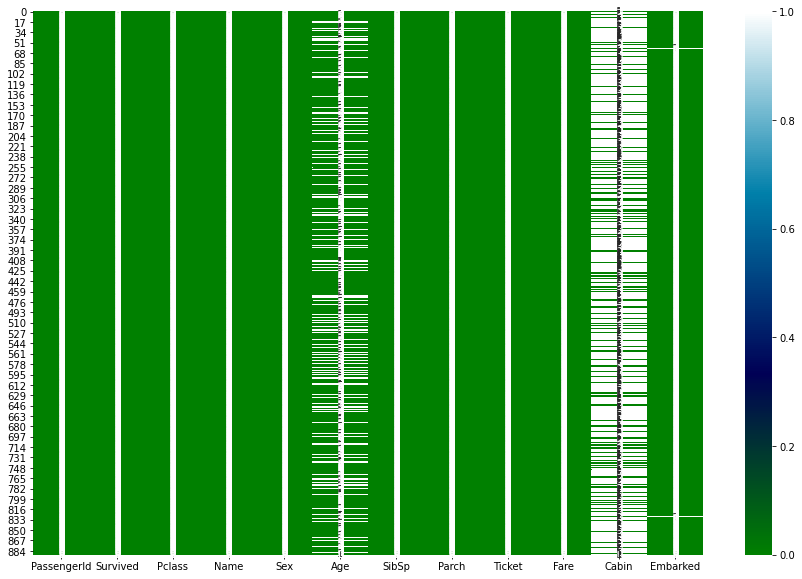

In [52]:
plt.figure(figsize = (15,10))
sns.heatmap(tit_df.isnull(),annot=True,cmap='ocean')

In [49]:
tit_df2 = tit_df.drop(columns = ['Cabin'])

In [51]:
tit_df2.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [61]:
tit_df['cabin_null']  = np.where(tit_df['Cabin'].isnull(),1,0)   # 1 means missing/null data
tit_df['cabin_null'].mean()

0.7710437710437711

In [63]:
tit_df['cabin_null'].head(10)

0    1
1    0
2    1
3    0
4    1
5    1
6    0
7    1
8    1
9    1
Name: cabin_null, dtype: int32

In [68]:
tit_df.groupby(['Survived'])['cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

# missing complete at random method

1. mean/median/mode replacement
2. Random Sampling imputation
3. capturing NaN values witha new features
4. End of distribution imputation
5. Arbitrary imputation
6. frequent categories imputation

# first method mean/median/mode

In [73]:
mcr = pd.read_csv('titanic.csv',usecols= ['Age','Fare','Survived'])
mcr.head(20)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
5,0,NaN,8.4583
6,0,54.0,51.8625
7,0,2.0,21.0750
8,1,27.0,11.1333
9,1,14.0,30.0708


In [96]:
mcr.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [79]:
mcr2 = mcr.fillna(mcr['Age'].mean())
mcr2

,Survived,Age,Fare
0,0,22.000000,7.2500
1,1,38.000000,71.2833
2,1,26.000000,7.9250
3,1,35.000000,53.1000
4,0,35.000000,8.0500
...,...,...,...
886,0,27.000000,13.0000
887,1,19.000000,30.0000
888,0,29.699118,23.4500
889,1,26.000000,30.0000


In [83]:
mcr2.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [85]:
#let see standard deviation b/w orignal Age and change with means of  age  
print(mcr['Age'].std())
print(mcr2['Age'].std())

14.526497332334042
13.002015226002882


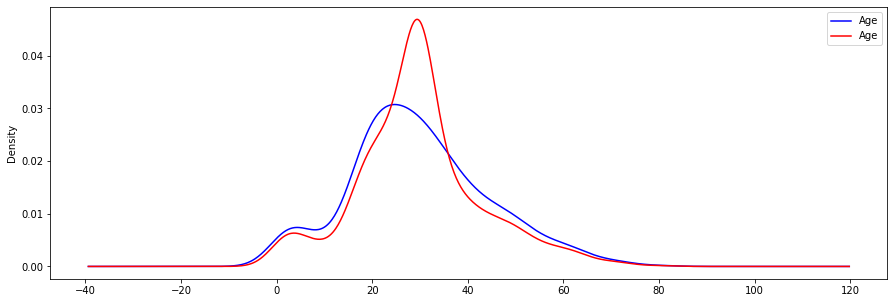

In [91]:
plt.figure(figsize =(15,5))
mcr['Age'].plot(kind ='kde', color ='blue',)#kde is kernel density estimator
mcr2['Age'].plot(kind = 'kde', color = 'red')
plt.legend()

### Mean/median/mode disadvantage

1. change and distortion in original varience
2. impact of correlation features

# 2nd method random sampling imputation

In [107]:
# in which null values replace with  randam values
rand_df = pd.read_csv('titanic.csv',usecols = ['Age','Fare','Survived'])
rand_df.head(20)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
5,0,NaN,8.4583
6,0,54.0,51.8625
7,0,2.0,21.0750
8,1,27.0,11.1333
9,1,14.0,30.0708


In [109]:
rand_df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [110]:
rand_df['Age'].mean()

29.69911764705882

In [119]:
# we are use random state zero so it is not change values  when again agin run program
rand_df['Age'].dropna().sample(rand_df['Age'].isnull().sum(),random_state =0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [127]:
def impute_nan(rand_df,variable,median):
    rand_df[variable+'_median']=rand_df[variable].fillna(median)
    rand_df[variable+'_random']=rand_df[variable]
    
    #it will have random sample to fill the na 
    rand_sample = rand_df[variable].dropna().sample(rand_df[variable].isnull().sum(),random_state =0)
    
    #pandas need to have same index in the order to merge the datasets
    rand_sample.index = rand_df[rand_df[variable].isnull()].index
    rand_df.loc[rand_df[variable].isnull(),variable+'_random']=rand_sample
    

In [128]:
median = rand_df['Age'].median()
median

28.0

In [129]:
impute_nan(rand_df,'Age',median)

In [130]:
rand_df.head() # so add two new features Age median and random

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


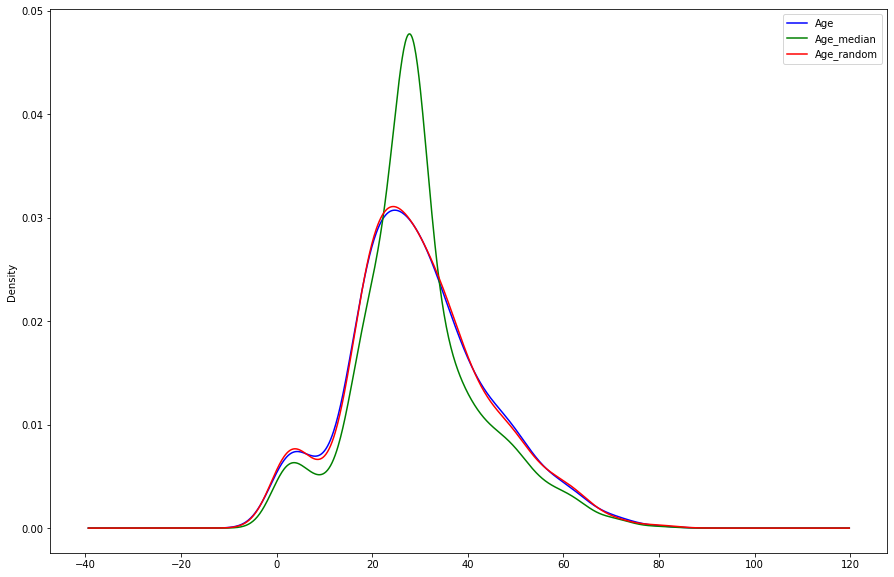

In [132]:
plt.figure(figsize = (15,10))
rand_df['Age'].plot(kind = 'kde',color ='blue')
rand_df['Age_median'].plot(kind = 'kde',color = 'green')
rand_df['Age_random'].plot(kind = 'kde',color = 'red')
plt.legend()

 so that Age and random_age are standard deviation graph are almost same but green is follow normal distribution

###Advantages:-
There is no distortion and variance

###disadvantages:-
Every time randomness not work properly

# 3rd method:- Capturing NaN values with a new features

In [133]:
new_fea = pd.read_csv('titanic.csv',usecols = ['Age','Fare','Survived'])
new_fea

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [134]:
new_fea.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [137]:
new_fea['Age_new_fea'] = np.where(new_fea['Age'].isnull(),1,0)
new_fea.head(20)

,Survived,Age,Fare,Age_new_fea
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,NaN,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


In [138]:
medin = new_fea.Age.median()
medin

28.0

In [140]:
new_fea['Age'].fillna(medin,inplace = True) # inplace is used to set vales in datasets
new_fea.head(20)

,Survived,Age,Fare,Age_new_fea
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


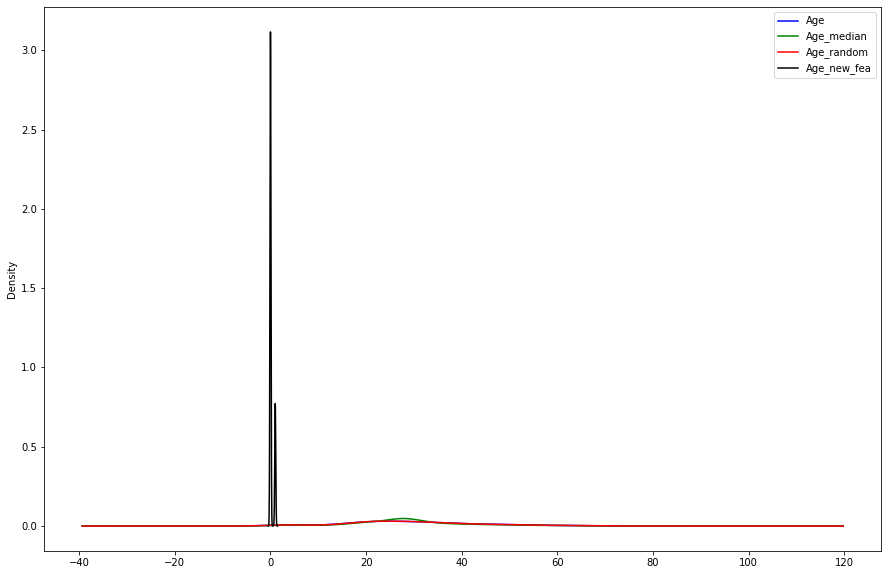

In [141]:
plt.figure(figsize = (15,10))
rand_df['Age'].plot(kind = 'kde',color ='blue')
rand_df['Age_median'].plot(kind = 'kde',color = 'green')
rand_df['Age_random'].plot(kind = 'kde',color = 'red')
new_fea['Age_new_fea'].plot(kind = 'kde',color ='black')
plt.legend()

##Advantages:-
Capturing the importanc of missing values and eassy to implementation

##disadvatages:
Creating the Addition features(curse of Dimensionality)

# 4th methods Ends of distribution imputation

In [142]:
ed = pd.read_csv('titanic.csv',usecols = ['Age','Fare','Survived'])
ed

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


<AxesSubplot:>

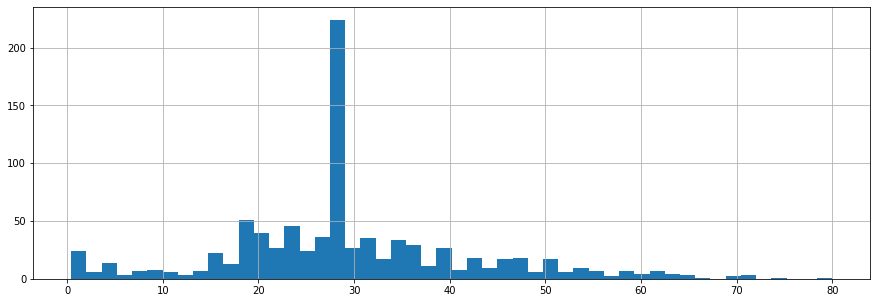

In [162]:
plt.figure(figsize = (15,5))
ed.Age.hist(bins=50)

In [146]:
extreme = ed.Age.mean()+3*ed.Age.std()
extreme

73.27860964406094

c:\users\ankit\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

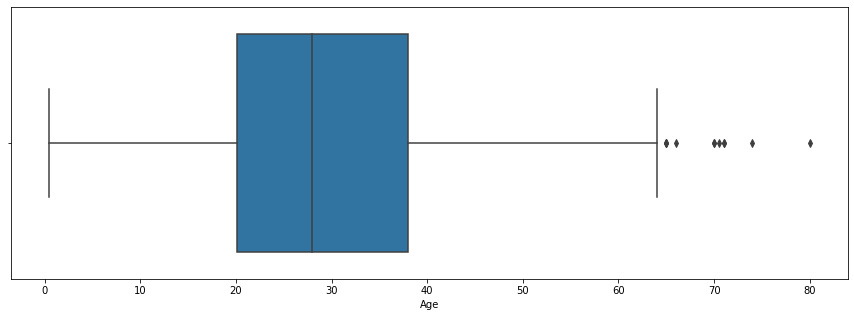

In [151]:
plt.figure(figsize = (15,5))
sns.boxplot('Age',data =ed)

In [152]:
def end_dis(ed,variable,extreme):
    ed[variable+'_end_distribution'] = ed[variable].fillna(extreme)
    ed[variable].fillna(median,inplace = True)

In [153]:
end_dis(ed,'Age',extreme)

In [154]:
ed.head(20)

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
5,0,28.0,8.4583,73.27861
6,0,54.0,51.8625,54.00000
7,0,2.0,21.0750,2.00000
8,1,27.0,11.1333,27.00000
9,1,14.0,30.0708,14.00000


<AxesSubplot:>

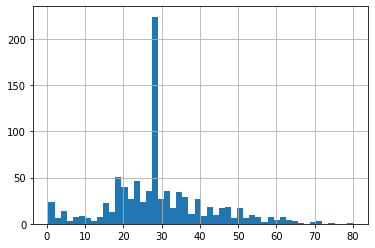

In [155]:
ed['Age'].hist(bins=50)

<AxesSubplot:>

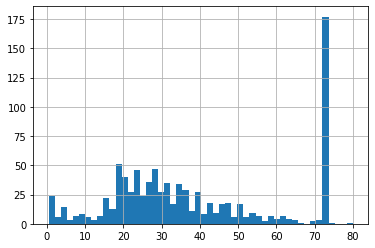

In [156]:
ed['Age_end_distribution'].hist(bins=50)

<AxesSubplot:xlabel='Age_end_distribution'>

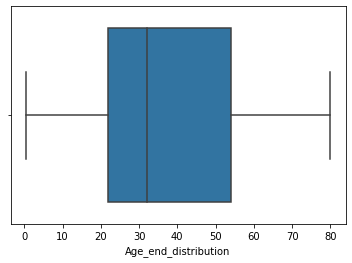

In [158]:
sns.boxplot('Age_end_distribution',data = ed)

###advantages:
 Not outlier occures in this method